## Trabalho Final 
### Curso - Turma 1/2020 - Ciência de Dados - Aperfeiçoamento de carreiras - ENAP
#### Instrutor: Alex Lopes Pereira
#### Aluno: Halisson Souza Gomides
#### E-mail: <halisson.gomides@gmail.com>

## Objetivo
- Prever a Taxa de Mortalidade Infantil em Municípios Brasileiros
2. Identificar o que priorizar para reduzir a taxa de mortalidade infantil para um município específico, comparando suas características com as de outros municípios para suporte à decisão de que medidas gerariam o maior impacto.
3. O uso de mais de 200 identificadores demográficos dos 5.565 municípios brasileiros disponíveis no Atlas do Desenvolvimento Humano no Brasil (http://www.atlasbrasil.org.br/2013/pt/) permitiria prever algum outro indicador de difícil mensuração direta. Aqui, no caso, procura-se estimar a taxa de mortalidade infantil com base nos demais indicadores, avaliar a contribuição de cada indicador no modelo para então decidir quais desses indicadores procuraria-se alterar para promover uma redução na taxa de mortalidade. **ALERTA**: o modelo de previsão aponta correlações entre indicadores e não relações de dependência causal. Assim, alterações induzidas em um indicador por alguma política pública não necessariamente surtirá o efeito esperado pelo modelo correlacional de alteração no indicador alvo.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
import locale

locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

'pt_BR.UTF-8'

In [2]:
path_ds = 'datasets/originais/radar_idhm_pnads'
path_altasdb = path_ds + '/atlas2013_dadosbrutos_pt.xlsx'
path_ind = path_ds + '/Indicadores_Atlas-RADAR_IDHM.xlsx'
# path_des = path_ds + '/DADOS_DO_ATLAS_DESAGREGADOS_POR_COR__SEXO_E_DOMICILIO_-_2000_E_2010_-_FINAL.xlsx'

### Comentários do aluno sobre os datasets
- No portal do atlas brasil (http://www.atlasbrasil.org.br/2013/pt/download/) encontrei 03 conjuntos de dados: 
    1. dados brutos por municípios - **Atlas dos Municípios**
    2. Dados com indicadores por UF - **Radar IDHM (PNADS 2011-2015)**
    3. Dados desagregados por Cor e Sexo - **Desagregações (CENSOS 2000 e 2010)**
    
- Como o desafio é analisar sob a ótica Municipal, descartei o dataset 2.
- Analisei o dataset 3 e vi que, apesar dele ter dados por município, apresenta-se incompleto com apenas 222 linhas.
- Também tentei o dataset sem os dados preparados (Ref: https://www.kaggle.com/c/icict-fiocruz-taxa-mort-brasil/overview) mas o link está quebrado ou não é público. Os dados não se encontram disponíveis para download.
- Assim sendo, resolvi trabalhar com o dataset 1.

In [3]:
df_atlas = pd.read_excel(path_altasdb, sheet_name='MUN 91-00-10')
df_atlas.rename(columns={'UF': 'CD_UF', 'Codmun6' : 'cod_ibge6', 'Codmun7' : 'cod_ibge7'}, inplace=True)

In [116]:
df_ind = pd.read_excel(path_ind, sheet_name='Dados')
df_ind.rename(columns={'NOME_AGREGA': 'SG_UF', 'AGREGA': 'CD_UF'}, inplace=True)

In [24]:
# df_des_cor = pd.read_excel(path_des, sheet_name='Cor MUN 2010')
# df_des_cor.rename(columns={'Num' : 'cod_ibge6', 'CODIGO_ID': 'Municipio'}, inplace=True)

In [100]:
print(df_atlas.shape)
df_atlas.head()

(16695, 237)


,ANO,CD_UF,cod_ibge6,cod_ibge7,Município,ESPVIDA,FECTOT,MORT1,MORT5,RAZDEP,...,PIA1517,PIA18M,POP,POPT,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R
0,1991,11,110001,1100015,ALTA FLORESTA D'OESTE,62.01,4.08,45.58,58.05,73.50,...,NaN,NaN,23417,22835,0.117,0.109,0.329,0.112,0.617,0.516
1,1991,11,110002,1100023,ARIQUEMES,66.02,3.72,32.39,41.41,69.97,...,NaN,NaN,56061,55018,0.200,0.199,0.432,0.199,0.684,0.593
2,1991,11,110003,1100031,CABIXI,63.16,3.89,41.52,52.94,77.23,...,NaN,NaN,7601,5846,0.111,0.106,0.309,0.108,0.636,0.430
3,1991,11,110004,1100049,CACOAL,65.03,3.81,35.37,45.19,71.11,...,NaN,NaN,69173,66534,0.176,0.169,0.407,0.171,0.667,0.593
4,1991,11,110005,1100056,CEREJEIRAS,62.73,3.55,43.00,54.82,71.09,...,NaN,NaN,19451,19030,0.152,0.175,0.386,0.167,0.629,0.547


In [41]:
# print(len(df_ind))
# df_ind.head(8)

190


,ANO,SG_UF,CD_UF,ESPVIDA,MORT1,T_ENV,RAZDEP,ANOSEST,T_ANALF15M,T_ANALF18M,...,POP25M,POP65M,POPT,POPTOT,I_ESCOLARIDADE,I_FREQ_PROP,IDHM_E,IDHM_L,IDHM_R,IDHM
0,2011,BRASIL,1,74.20,16.43,8.25,46.01,8.36,8.58,9.14,...,118298702,16316954,184141369,186116880,0.609,0.712,0.676,0.820,0.718,0.738
1,2012,BRASIL,1,74.52,15.69,8.63,45.91,8.60,8.66,9.23,...,120709478,17228229,188347910,190315001,0.602,0.723,0.681,0.825,0.730,0.745
2,2013,BRASIL,1,74.84,15.02,8.88,45.25,8.70,8.52,9.08,...,123248633,17889344,187430383,189853572,0.617,0.740,0.696,0.831,0.735,0.754
3,2014,BRASIL,1,75.14,14.40,9.29,44.75,8.79,8.27,8.80,...,126014243,18869998,193700603,194603344,0.618,0.754,0.706,0.836,0.741,0.761
4,2015,BRASIL,1,75.44,13.82,9.87,44.69,8.92,7.95,8.46,...,128722544,20211426,198239053,199120820,0.629,0.760,0.713,0.841,0.729,0.761
5,2011,RO,11,70.32,22.24,5.29,45.77,7.60,9.74,10.66,...,932158,89420,1573035,1587902,0.557,0.637,0.609,0.755,0.697,0.687
6,2012,RO,11,70.53,21.75,4.99,44.60,7.94,8.57,9.26,...,945728,85458,1633695,1649946,0.558,0.672,0.632,0.759,0.703,0.698
7,2013,RO,11,70.74,21.27,5.60,43.78,7.80,8.56,9.24,...,987618,97140,1644167,1670217,0.544,0.675,0.628,0.762,0.699,0.696


In [40]:
# print(len(df_des_cor))
# df_des_cor.head()

222


,cod_ibge6,ID,Municipio,ANO,DESAGREGAÇÃO,ESPVIDA,FECTOT,MORT1,MORT5,SOBRE40,...,PIA1014,PIA1517,PIA18M,POP,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R
0,110020,2010110020,PORTO VELHO,2010,BRANCO,77.32,1.98,13.09,10.60,97.18,...,10133,7153,85767,123489,0.704,0.716,0.798,0.712,0.872,0.819
1,110020,2010110020,PORTO VELHO,2010,NEGRO,73.17,2.16,16.07,18.69,96.25,...,30110,17512,196619,289521,0.587,0.629,0.713,0.615,0.803,0.734
2,120040,2010120040,RIO BRANCO,2010,BRANCO,74.00,1.97,17.83,13.65,95.96,...,8488,4636,55536,85108,0.698,0.751,0.778,0.733,0.817,0.787
3,120040,2010120040,RIO BRANCO,2010,NEGRO,72.64,2.45,21.13,24.06,95.08,...,26413,15725,156416,239934,0.576,0.682,0.711,0.645,0.794,0.703
4,130260,2010130260,MANAUS,2010,BRANCO,75.00,1.90,13.04,13.92,97.28,...,44694,27849,312356,474160,0.750,0.711,0.786,0.724,0.833,0.805


### Comentários do aluno sobre as variáveis
- O dataset 1 (df_atlas), que é o conjunto de dados desse trabalho, possui **237 colunas** (shape = (16695, 237)), ou seja, 236 variáveis que podem ser analisadas em busca de identificar relação com a variável de mortalidade infantil.
- Dentre esse universo de variáveis, estudei o dicionário dos dados para selecionar as que imaginei que poderia ter alguma relação com a mortalidade infantil, a partir de sua definição.

In [131]:
# Setando o universo de variáveis escolhidas para analise em cada dataset

lst_col_atlas = ['ANO', 'CD_UF', 'cod_ibge6', 'Município', 'ESPVIDA', 'MORT1', 'RAZDEP', 'T_ENV', 'CORTE1', \
                 'CORTE9', 'GINI', 'PIND', 'PINDCRI', 'R1040', 'RDPC', 'RDPC1','RDPC5', 'RIND', \
                 'THEIL', 'RENOCUP', 'T_BANAGUA', 'T_LIXO', 'AGUA_ESGOTO', 'T_M10A14CF', 'T_SLUZ', \
                 'T_NESTUDA_NTRAB_MMEIO', 'peso1', 'IDHM']

lst_col_ind = ['ANO', 'SG_UF', 'CD_UF', 'ESPVIDA', 'MORT1', 'RAZDEP', 'T_ENV', 'GINI', 'PIND', 'R1040', \
              'RDPC', 'RDPC1', 'RDPC5', 'RIND', 'THEIL', 'IDHM']

lst_col_des_cor = ['cod_ibge6', 'Municipio', 'ANO', 'DESAGREGAÇÃO', 'ESPVIDA', 'MORT1', 'RAZDEP', 'T_ENV', \
                  'CORTE1', 'CORTE9', 'GINI', 'PIND', 'PINDCRI', 'R1040', 'RDPC', 'RDPC1', 'RDPC5', \
                  'RIND', 'THEIL', 'RENOCUP', 'T_BANAGUA', 'T_LIXO', 'T_AGUA_ESGOTO', 'T_SLUZ', \
                  'T_VULNERA_NESTUDA_NTRAB_MMEIO', 'PESO1', 'IDHM']

df_rec_atlas = df_atlas[lst_col_atlas]
# df_rec_ind = df_ind[lst_col_ind] - dataset desprezado (Ver seção "Comentários do aluno sobre os datasets")
# df_rec_cor = df_des_cor[lst_col_des_cor] - - dataset desprezado (Ver seção "Comentários do aluno sobre os datasets")

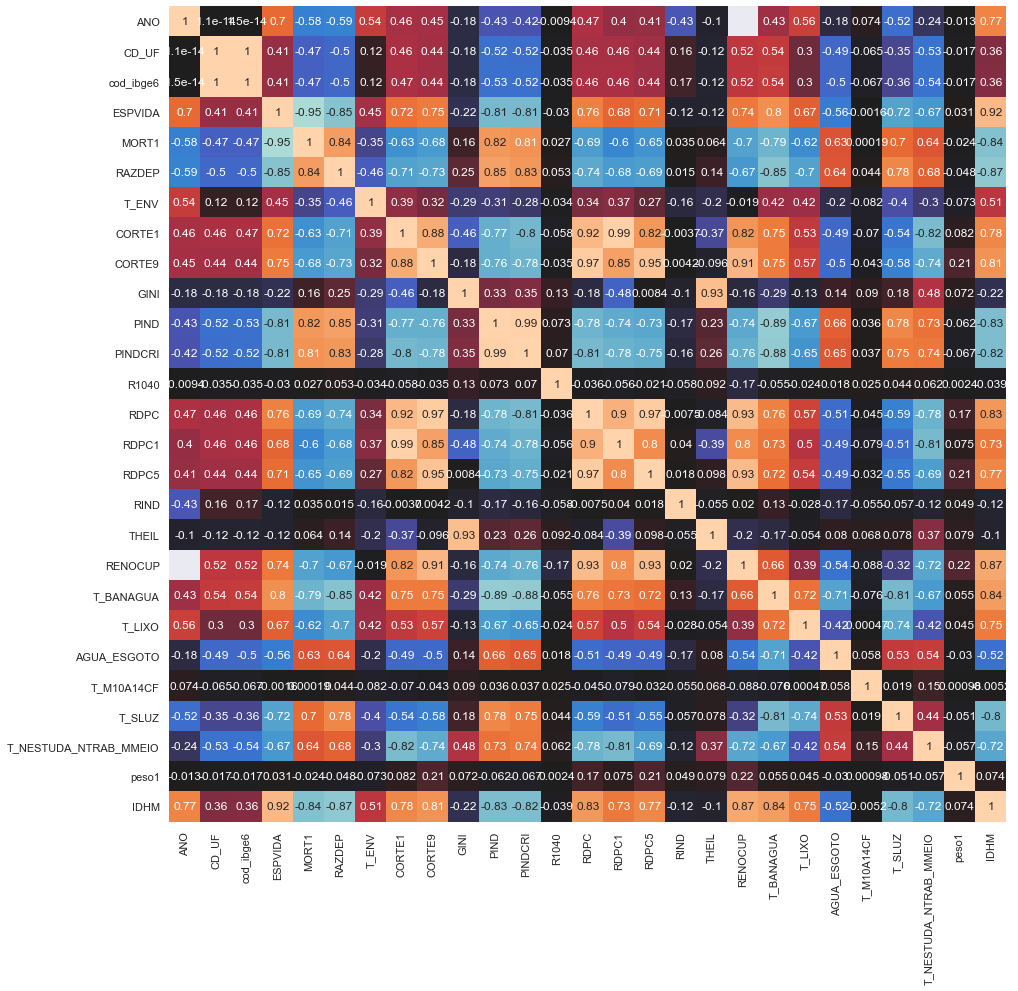

In [96]:
sns.set(rc={'figure.figsize':(15,15)})
g = sns.heatmap(df_rec_atlas.corr(), annot=True, vmin=-1, vmax=1, center=0, cbar=False)

De acordo com o dicionário dos dados a variável dependente é **MORT1: Mortalidade até um ano de idade**

>**Definição:** Número de crianças que não deverão sobreviver ao primeiro ano de vida em cada 1000 crianças nascidas vivas.


A partir da análise do mapa de calor plotado, as variáveis que monstram ter correlação forte com a variável dependente **MORT1**:

>#####  ESPVIDA (-), RAZDEP (+), PIND (+), PINDCRI (+), RENOCUP(-), T_BANAGUA (-), T_SLUZ, IDHM (-)



| SIGLA     |                                                                                                                        DEFINIÇÃO                                                                                                                        |
|-----------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
| ESPVIDA   |                           Número médio de anos que as pessoas deverão viver a partir do nascimento, se permanecerem <br>constantes ao longo da vida o nível e o padrão de mortalidade por idade prevalecentes no ano do Censo.                          |
| RAZDEP    | Razão de dependência é medida pela razão entre o número de pessoas com 14 anos ou menos e de 65 <br>anos ou mais de idade (população dependente) e o número de pessoas com idade de 15 a 64 anos (população potencialmente ativa) multiplicado por 100. |
| PIND      |               Proporção dos indivíduos com renda domiciliar per capita igual ou inferior a R 70,00 mensais, <br>em reais de agosto de 2010. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes.               |
| PINDCRI   |  Proporção dos indivíduos com até 14 anos de idade que têm renda domiciliar per capita igual ou inferior <br>a 70,00 mensais, em reais de agosto de 2010. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes. |
| RENOCUP   | Média dos rendimentos de todos os trabalhos das pessoas ocupadas de 18 anos ou mais de idade. Valores em reais de agosto de 2010.                                                                                                                       |
| T_BANAGUA |                                                                                       Percentual da população que vive em domicílios com banheiro e água encanada                                                                                       |
| T_SLUZ    | Razão entre as pessoas que vivem em domicílios sem energia elétrica e população total residente em domicílios particulares permanentes multiplicado por 100.                                                                                            |
| IDHM      |                                                                                                        Índice de Desenvolvimento Humano Municipal                                                                                                       |

### Comentários do aluno sobre as variáveis

> a variável **ESPVIDA** parece ter uma correlação trivial com a variável dependente, pois quanto maior número médio de anos que as pessoas deverão viver a partir do nascimento, menor deve ser a mortalidade de crianças até um ano de vida.
Poranto, decidiu-se excluir essa variável do estudo.

>A variável **RAZDEP** parece ter uma correlação trivial com a variável dependente, pois quanto maior
a razão de dependência, entende-se que há maior quantidade de pessoas com 14 anos ou menos e de 65 anos ou mais. Assim, aumentando o universo de pessoas com 14 anos ou menos, o número de crianças que não deverão sobreviver ao primeiro ano de vida em cada 1000 crianças nascidas vivas, naturamente aumenta.
Poranto, decidiu-se excluir essa variável do estudo.



In [102]:
# Estatísticas descritivas da variável dependente
print("Estatísticas descritivas de MORT1:")
df_atlas['MORT1'].describe()

Estatísticas descritivas de MORT1:


count    16695.000000
mean        33.267208
std         20.216337
min          8.490000
25%         18.440000
50%         27.000000
75%         41.615000
max        120.120000
Name: MORT1, dtype: float64

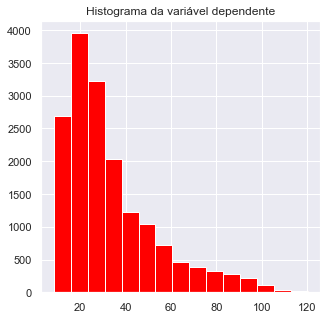

In [113]:
# verificando a distribuição da variável dependente
plt.figure(figsize=(5,5))
plt.hist(df_atlas['MORT1'], color='red', bins=15)
plt.title('Histograma da variável dependente')
plt.show()

In [97]:
# Verificando se existem valores nulos
df_rec_atlas.isnull().values.any()

True

In [68]:
# Criando o modelo de regressão com o statsmodel
import statsmodels.api as sm

df_model = df_rec_atlas.dropna()

# Definindo a coluna que vai conter a variavel dependente
y = df_model["MORT1"]

# Definindo  as colunas que contem variaveis independentes (preditoras)
X = df_model[["PIND", "PINDCRI", "RENOCUP", "T_BANAGUA", "T_SLUZ", "IDHM"]]

## adicionando o valor de interceptação do eixo y, o b da equação y = ax + b
X = sm.add_constant(X) 

# Fazendo a regressão
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  MORT1   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     2489.
Date:                ter, 01 set 2020   Prob (F-statistic):               0.00
Time:                        21:34:37   Log-Likelihood:                -15202.
No. Observations:                5565   AIC:                         3.042e+04
Df Residuals:                    5558   BIC:                         3.046e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.4149      1.201     56.949      0.000      66.060      70.770
PIND          -0.1642      0.036     -4.597      0.000      -0.234      -0.094
PINDCRI        0.1984      0.026      7.526      0.000       0.147       0.250
RENOCUP        0.0026      0.000      8.239      0.000       0.002       0.003
T_BANAGUA     -0.0745      0.005    -14.510      0.000      -0.085      -0.064
T_SLUZ        -0.2105      0.011    -19.280      0.000      -0.232      -0.189
IDHM         -69.5851      1.943    -35.806      0.000     -73.395     -65.775
==============================================================================
Omnibus:                      592.035   Durbin-Watson:                   1.532
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1195.584
Skew:                           0.683   Prob(JB):                    2.41e-260
Kurtosis:                       4.815   Cond. No.                     3.84e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Comentários do aluno sobre o modelo

> - O R² ajustado (**Adj. R-squared**) nos dá uma medida de porcentagem da variância explicada pelo modelo. 
Este modelo tem um poder explicativo de **72.8%**.
- O **p-valor ou P>|t|** para os coeficientes estimados é menor que 0.001, o que mostra que eles são
estatisticamente significativos.
- Outra informação importante é a estatística F (**F-statistic**), que dá uma estimativa de qualidade do modelo ao comparar o modelo ajustado com um modelo hipotético em que apenas o intercepto seja diferente de zero. A probabilidade de que o modelo "zerado" erre menos que o modelo ajustado é dada por **Prob(F-statist)**.
- Nota-se também que o modelo pegou muito bem as relações entre as variáveis e os valores estão todos dentro do intervalo de confiança estimado.

> Inicialmente eu utilizei as duas variáveis desprezadas no modelo final (*ESPVIDA*, *RAZDEP*). No entanto, o p-valor para alguns coeficientes ficaram maior que 0.05, degradando o modelo. Além disso, após refletir sobre a definição dessas variáveis, inferi que são de correção trivial com a variável a ser predita (*MORT1*)

***
#### Investigando a adequabilidade do modelo de regressão com base nos resíduos
- **resíduos** = são os erros de predição, representam a diferença entre a previsão e o que realmente aconteceu. (Fonte: https://www.kaggle.com/marilivb/4-regress-o-linear)
- A ideia básica da análise dos resíduos é que, se o modelo for apropriado, os resíduos devem refletir as propriedades impostas pelo termo de erro do modelo. Tais suposições são:
    1. O termo do erro é não correlacionado com a variável resposta;

    2. O termo do erro possui distribuição normal com média 0;

    3. Os erros têm distribuição normal;

    4. O termo do erro é homoscedástico, ou seja, possui variância constante em toda a sua extensão.
(Fonte:https://neylsoncrepalde.github.io/2018-02-25-regressao-linear-python/)

Text(0.5, 1.0, 'Histograma dos resíduos da regressão')

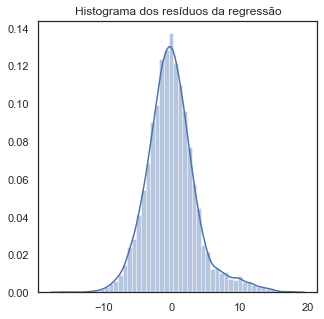

In [87]:
# Histograma - distribuição dos resíduos

# Valores preditos
pred = model.predict()

# residuos
res = model.resid # corresponde a res = pred - y

sns.set(rc={'figure.figsize':(5,5)})
sns.set_style("white")
g = sns.distplot(res)
g.set_title("Histograma dos resíduos da regressão")

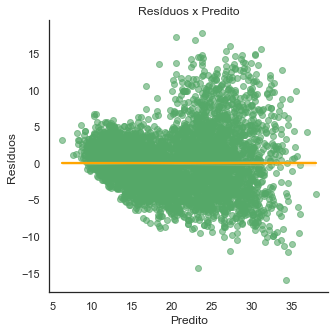

In [88]:
# Gráfico de dispersão dos valores preditos

gd = sns.regplot(x= pred, y= res, color='g', scatter_kws={'alpha':0.6}, line_kws={'color': 'orange'})
gd.set_title("Resíduos x Predito")
gd.set(xlabel='Predito', ylabel='Resíduos')
sns.despine()

In [71]:
coefs = pd.DataFrame(model.params)
coefs.columns = ['Coeficientes']
coefs

,Coeficientes
const,68.414878
PIND,-0.164199
PINDCRI,0.198436
RENOCUP,0.002562
T_BANAGUA,-0.074527
T_SLUZ,-0.210540
IDHM,-69.585065


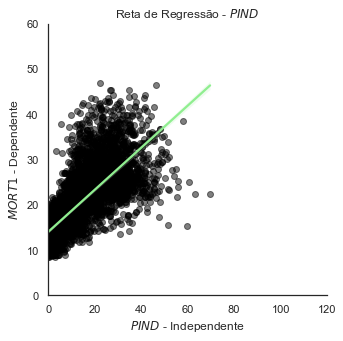

In [74]:
# Análise em entre as variáveis
# Variável dependente e variável PIND - Proporção dos indivíduos com renda domiciliar per capita igual
# ou inferior a R 70,00 mensais, em reais de agosto de 2010. 
# O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes.

gpind = sns.regplot(x=df_model['PIND'], y=df_model['MORT1'], color='black', scatter_kws={'alpha':.5}, line_kws={'color': 'lightgreen'})
gpind.set_title("Reta de Regressão - $PIND$")
gpind.set(xlabel='$PIND$ - Independente', ylabel='$MORT1$ - Dependente')
gpind.set(xlim = (0, 120)) 
gpind.set(ylim = (0, 60))
sns.despine()

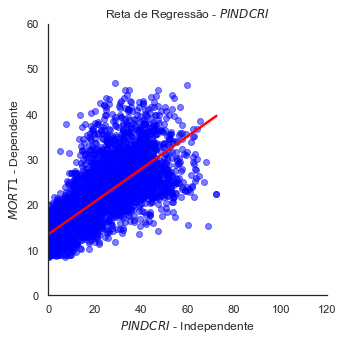

In [75]:
# Análise em entre as variáveis
# Variável dependente e variável PINDCRI - Proporção dos indivíduos com até 14 anos de idade que têm 
# renda domiciliar per capita igual ou inferior a 70,00 mensais, em reais de agosto de 2010. 
# O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes.

gpind = sns.regplot(x=df_model['PINDCRI'], y=df_model['MORT1'], color='blue', scatter_kws={'alpha':.5}, line_kws={'color': 'red'})
gpind.set_title("Reta de Regressão - $PINDCRI$")
gpind.set(xlabel='$PINDCRI$ - Independente', ylabel='$MORT1$ - Dependente')
gpind.set(xlim = (0, 120)) 
gpind.set(ylim = (0, 60))
sns.despine()

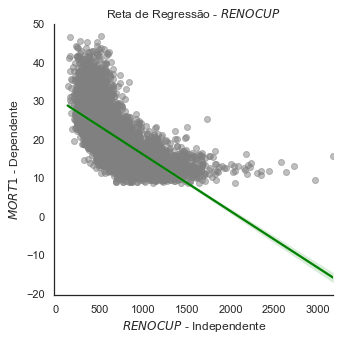

In [59]:
# Análise em entre as variáveis
# Variável dependente e variável RENOCUP - Média dos rendimentos de todos os trabalhos das pessoas 
# ocupadas de 18 anos ou mais de idade. Valores em reais de agosto de 2010.

grenda = sns.regplot(x=df_model['RENOCUP'], y=df_model['MORT1'], color='grey', scatter_kws={'alpha':.5}, line_kws={'color': 'green'})
grenda.set_title("Reta de Regressão - $RENOCUP$")
grenda.set(xlabel='$RENOCUP$ - Independente', ylabel='$MORT1$ - Dependente')
sns.despine()

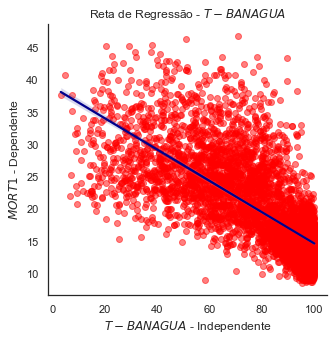

In [66]:
# Análise em entre as variáveis
# Variável dependente e variável T_BANAGUA - Percentual da população que vive em domicílios com 
# banheiro e água encanada.

gbanagua = sns.regplot(x=df_model['T_BANAGUA'], y=df_model['MORT1'], color='red', scatter_kws={'alpha':.5}, line_kws={'color': 'darkblue'})
gbanagua.set_title("Reta de Regressão - $T-BANAGUA$")
gbanagua.set(xlabel='$T-BANAGUA$ - Independente', ylabel='$MORT1$ - Dependente')
# gbanagua.set(xlim = (0, 120)) 
# gbanagua.set(ylim = (0, 60))
sns.despine()

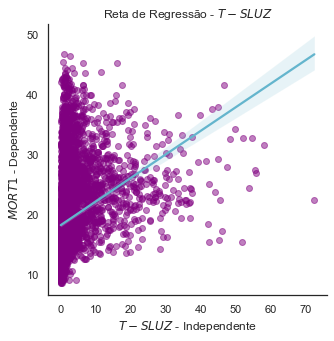

In [80]:
# Análise em entre as variáveis
# Variável dependente e variável T_SLUZ - % de pessoas em domicílios sem energia elétrica

gsemluz = sns.regplot(x=df_model['T_SLUZ'], y=df_model['MORT1'], color='purple', \
                      scatter_kws={'alpha':.5}, line_kws={'color': 'c'})
gsemluz.set_title("Reta de Regressão - $T-SLUZ$")
gsemluz.set(xlabel='$T-SLUZ$ - Independente', ylabel='$MORT1$ - Dependente')
sns.despine()

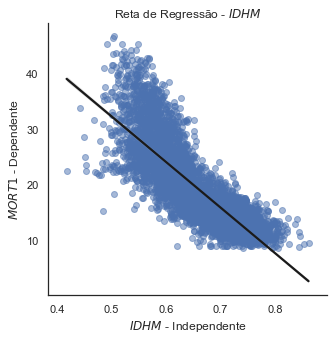

In [82]:
# Análise em entre as variáveis
# Variável dependente e variável IDHM - Índice de Desenvolvimento Humano Municipal

gidhm = sns.regplot(x=df_model['IDHM'], y=df_model['MORT1'], color='b', \
                      scatter_kws={'alpha':.5}, line_kws={'color': 'K'})
gidhm.set_title("Reta de Regressão - $IDHM$")
gidhm.set(xlabel='$IDHM$ - Independente', ylabel='$MORT1$ - Dependente')
sns.despine()

##### Análise de MORT1 por região geográfica
##### Trabalhando os dados do dataframe

In [132]:
import warnings
warnings.filterwarnings('ignore')


dict_uf = df_ind[['CD_UF', 'SG_UF']].set_index('CD_UF').to_dict()['SG_UF']
df_rec_atlas['SG_UF'] = df_rec_atlas['CD_UF'].map(dict_uf)
df_rec_atlas.loc[:,['CD_UF','SG_UF']]

,CD_UF,SG_UF
0,11,RO
1,11,RO
2,11,RO
3,11,RO
4,11,RO
...,...,...
16690,52,GO
16691,52,GO
16692,52,GO
16693,52,GO


In [134]:
df_rec_atlas.head()

,ANO,CD_UF,cod_ibge6,Município,ESPVIDA,MORT1,RAZDEP,T_ENV,CORTE1,CORTE9,...,RENOCUP,T_BANAGUA,T_LIXO,AGUA_ESGOTO,T_M10A14CF,T_SLUZ,T_NESTUDA_NTRAB_MMEIO,peso1,IDHM,SG_UF
0,1991,11,110001,ALTA FLORESTA D'OESTE,62.01,45.58,73.50,1.82,39.18,352.58,...,NaN,18.47,6.82,7.45,0.00,63.20,NaN,700,0.329,RO
1,1991,11,110002,ARIQUEMES,66.02,32.39,69.97,1.82,72.08,656.26,...,NaN,48.50,78.30,2.55,1.03,26.72,NaN,1614,0.432,RO
2,1991,11,110003,CABIXI,63.16,41.52,77.23,2.59,0.00,268.63,...,NaN,10.67,50.92,0.63,0.00,74.96,NaN,202,0.309,RO
3,1991,11,110004,CACOAL,65.03,35.37,71.11,2.47,56.41,587.63,...,NaN,42.81,65.59,1.19,0.52,42.66,NaN,1874,0.407,RO
4,1991,11,110005,CEREJEIRAS,62.73,43.00,71.09,2.46,53.73,523.38,...,NaN,40.81,32.87,0.55,0.00,43.64,NaN,496,0.386,RO


In [278]:
dict_regioes = {'Centro-Oeste': ['GO', 'MT', 'MS', 'DF'], 'Norte': ['AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO'], \
               'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PI', 'PE', 'PB', 'RN', 'SE'], 'Sul': ['PR', 'RS', 'SC'], \
               'Sudeste': ['ES', 'MG', 'RJ', 'SP']}

def estado_regiao(UF, dt_r=dict_regioes):
    
    for k,v in dt_r.items():
        if UF in v:
            return k
            
    
df_rec_atlas['REGIAO'] = df_rec_atlas['SG_UF'].apply(estado_regiao)
df_rec_atlas.loc[:,['SG_UF','REGIAO']]

,SG_UF,REGIAO
0,RO,Norte
1,RO,Norte
2,RO,Norte
3,RO,Norte
4,RO,Norte
...,...,...
16690,GO,Centro-Oeste
16691,GO,Centro-Oeste
16692,GO,Centro-Oeste
16693,GO,Centro-Oeste


In [272]:
# Para analisar os dados por região achei importante trabalhar com a proporção da mortalidade até 01 de vida em relação 
# população até 01 ano (variável 'peso1').

df_group_reg = df_rec_atlas.groupby(['ANO','REGIAO']).agg({'MORT1': 'sum', 'peso1': 'sum'})
df_group_reg

MORT1    peso1
ANO  REGIAO                          
1991 Centro-Oeste   14658.11   216525
     Nordeste      136699.60  1026448
     Norte          25475.55   278776
     Sudeste        55649.47  1211062
     Sul            33965.74   468502
2000 Centro-Oeste   12369.08   222234
     Nordeste       88061.27   996626
     Norte          17158.66   320883
     Sudeste        41026.72  1236985
     Sul            23222.38   436759
2010 Centro-Oeste    7329.05   210518
     Nordeste       48774.88   817711
     Norte           9688.34   302069
     Sudeste        25874.58  1024965
     Sul            15442.61   352728

Text(0.5, 0.98, '% de Mortalidade no primeiro ano de vida')

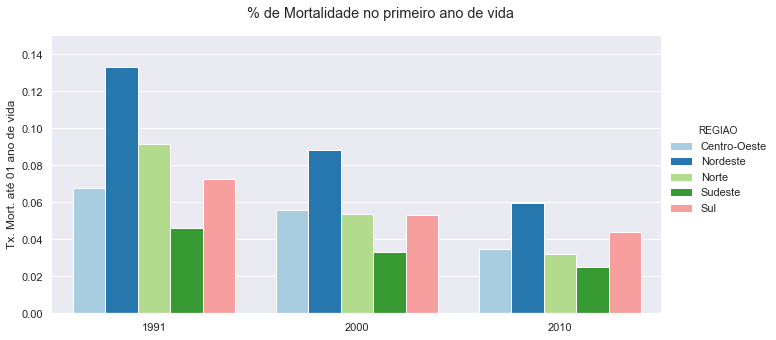

In [289]:
# Plotando o % de mortalidade infantil por ano em cada região geográfica do país

df_plot = df_group_reg[['MORT1', 'peso1']].reset_index()
df_plot['tx_mort1'] = df_plot['MORT1'] / df_plot['peso1']

sns.set_style('whitegrid') 
sns.set(rc={'figure.figsize':(5,15)})
g = sns.catplot(x='ANO', y='tx_mort1', hue="REGIAO", aspect=1.9, saturation=.9, \
            kind="bar", data=df_plot, ci=None, palette=("Paired"))
(g.set_axis_labels("", "Tx. Mort. até 01 ano de vida")\
.set_xticklabels(["1991", "2000", "2010"])\
.set_titles("{col_var} - {col_name}")\
.set(ylim=(0,0.15))\
.despine(left=True))  

plt.subplots_adjust(top=0.9)
g.fig.suptitle('% de Mortalidade no primeiro ano de vida')


#### Achados a partir da análise do gráfico acima
- Nota-se que em todas as regiões a taxa de mortalidade vem caindo ao longo do tempo.
- Nota-se que no último ano da amostra, a região Sul apresenta a segunda maior taxa de mortalidade infantil até um ano de vida, atrás apenas da região Nordeste, ao contrário do que naturalmente se espera, por ser uma das regiões mais bem desenvolvidas do país.
- Outro dado importante é de que a região Norte apresentou taxa de mortalidade infantil no último ano analisado menor que a região Centro-Oeste.

Text(0.5, 0.98, '% de Mortalidade no primeiro ano de vida')

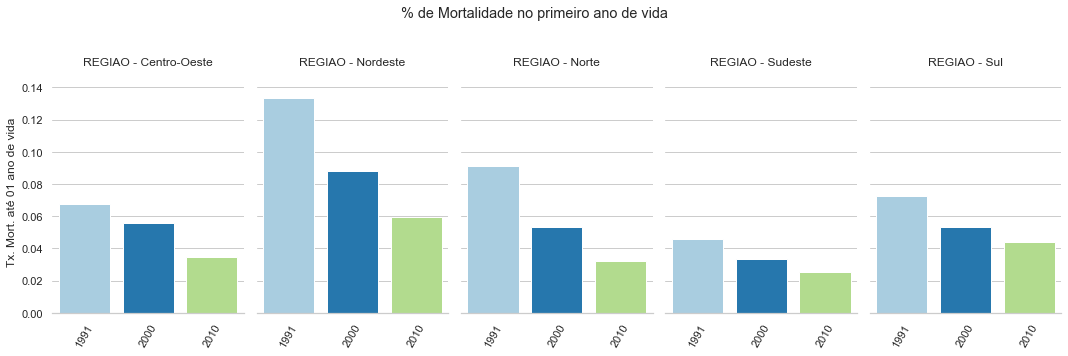

In [290]:
# modo de vizualização agrupado por região

sns.set(rc={'figure.figsize':(6,5)})
sns.set_style('whitegrid') 
g = sns.catplot(x='ANO', y='tx_mort1', col="REGIAO", aspect=.6, saturation=.9, \
            kind="bar", data=df_plot, ci=None, palette=("Paired"))
(g.set_axis_labels("", "Tx. Mort. até 01 ano de vida")\
.set_xticklabels(["1991", "2000", "2010"])\
.set_xticklabels(rotation=60)\
.set_titles("{col_var} - {col_name}")\
.set(ylim=(0,0.15))\
.despine(left=True)) 

plt.subplots_adjust(top=0.8)
g.fig.suptitle('% de Mortalidade no primeiro ano de vida')

### Comentário do Aluno acerca do gráfico por região
- Nas regiões NORTE e NORDESTE demonstram queda ascentuada da taxa ao longo dos anos analisados.
- Dentre as regiões, a região Sudeste é aque apresenta queda da taxa de mortalidade ao longo do período de forma menos ascentuada.
- A taxa de mortalidade na região Centro-Oeste teve uma queda mais ascentuada de 2000 para 2010 (aproximadamente 1/3).

---

##### Análise de MORT1 por município

In [322]:
df_mun = df_rec_atlas.copy()
df_mun['municipio-uf'] = df_mun['Município'] + ' - ' + df_mun['SG_UF']
df_group_mun = df_mun.groupby(['ANO','municipio-uf']).agg({'MORT1': 'sum', 'peso1': 'sum'})
df_group_mun

MORT1  peso1
ANO  municipio-uf                      
1991 ABADIA DE GOIÁS - GO  30.22    110
     ABADIÂNIA - GO        30.52    210
     ABAETETUBA - PA       44.63   3353
     ABAIARA - CE          64.98    200
     ABARÉ - BA            83.43    289
...                          ...    ...
2010 Águas Vermelhas - MG  17.80    151
     ÂNGULO - PR           13.20     34
     ÉRICO CARDOSO - BA    26.00    125
     ÓBIDOS - PA           25.80   1066
     ÓLEO - SP             12.60     36

[16695 rows x 2 columns]

Text(0.5, 0.98, 'Os 05 Municípios com maior tx. de mortalidade em cada ano analisado')

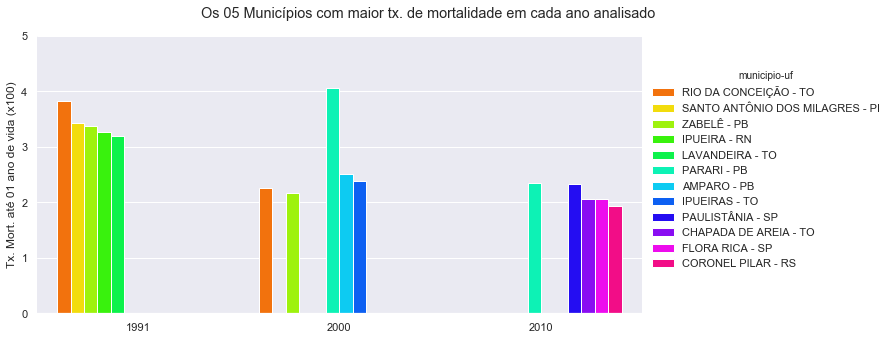

In [341]:
# Plotando o % de mortalidade infantil dos 05 Municípios com maior tx. de mortalidade infantil no primeiro ano de vida por ano.

df_m = df_group_mun[['MORT1', 'peso1']].reset_index()
df_m['tx_mort1'] = df_m['MORT1'] / df_m['peso1']
top5_1991 = df_m[df_m['ANO'] == 1991].sort_values(by='tx_mort1', ascending=False).head(5)
top5_2000 = df_m[df_m['ANO'] == 2000].sort_values(by='tx_mort1', ascending=False).head(5)
top5_2010 = df_m[df_m['ANO'] == 2010].sort_values(by='tx_mort1', ascending=False).head(5)
top5_ano = pd.concat([top5_1991, top5_2000, top5_2010])

sns.set_style('whitegrid') 
sns.set(rc={'figure.figsize':(5,15)})
g = sns.catplot(x='ANO', y='tx_mort1', hue="municipio-uf", aspect=1.9, saturation=.9, \
            kind="bar", data=top5_ano, ci=None, palette=("hsv"))
(g.set_axis_labels("", "Tx. Mort. até 01 ano de vida (x100)")\
.set_xticklabels(["1991", "2000", "2010"])\
.set_titles("{col_var} - {col_name}")\
.set(ylim=(0,5))\
.despine(left=True))  

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Os 05 Municípios com maior tx. de mortalidade em cada ano analisado')


#### Achados a partir da análise do gráfico acima
- Nota-se que os municípios de ZABELÊ - PB e RIO DA CONCEIÇÃO - TO figuraram nos top 5 com maior taxa de mortalidade nos anos de 1991 e 2000.
- E nos anos 2000 e 2010 o município de PARIRI - PB figurou na primeira posição em taxa de mortalidade infantil até 01 ano de vida.
- Outro dado importante é de o estado de SP, por meio de dois municípios (PAULISTANIA e FLORA RICA), passou a figurar no gráfico no último ano da análise (2010), o que não tinha acontecido nos anos anteriores da amostra.

Text(0.5, 0.98, 'Os 05 Municípios com maior tx. de mortalidade em cada ano analisado')

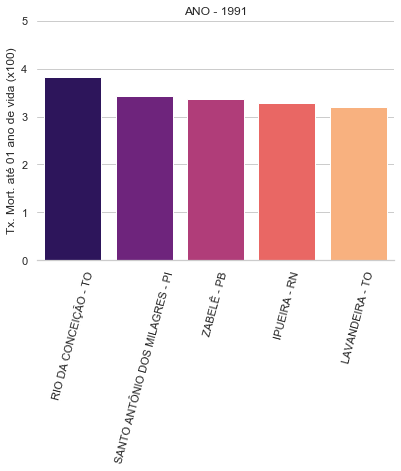

In [375]:
# modo de vizualização agrupado por município

sns.set(rc={'figure.figsize':(9,12)})
sns.set_style('whitegrid') 

g91 = sns.catplot(x='municipio-uf', y='tx_mort1', col="ANO", aspect=1.2, saturation=.9, \
            kind="bar", data=top5_1991, ci=None, palette=("magma"))
(g91.set_axis_labels("", "Tx. Mort. até 01 ano de vida (x100)")\
# .set_xticklabels( top5_ano[top5_ano['ANO'].isin(['{col_name}'])]['municipio-uf'].to_list() )\
.set_xticklabels(rotation=75)\
.set_titles("{col_var} - {col_name}")\
.set(ylim=(0,5))\
.despine(left=True)) 

plt.subplots_adjust(top=0.8)
g.fig.suptitle('Os 05 Municípios com maior tx. de mortalidade em cada ano analisado')

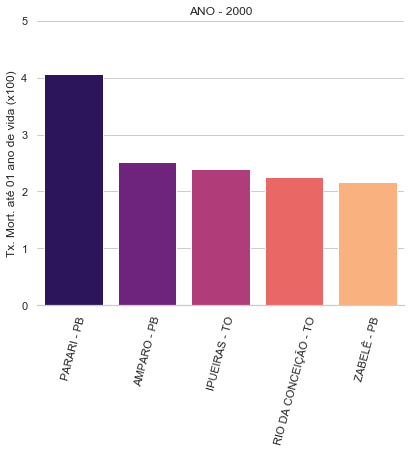

In [372]:
 
g00 = sns.catplot(x='municipio-uf', y='tx_mort1', col="ANO", aspect=1.2, saturation=.9, \
            kind="bar", data=top5_2000, ci=None, palette=("magma"))
(g00.set_axis_labels("", "Tx. Mort. até 01 ano de vida (x100)")\
# .set_xticklabels( top5_ano[top5_ano['ANO'].isin(['{col_name}'])]['municipio-uf'].to_list() )\
.set_xticklabels(rotation=75)\
.set_titles("{col_var} - {col_name}")\
.set(ylim=(0,5))\
.despine(left=True))

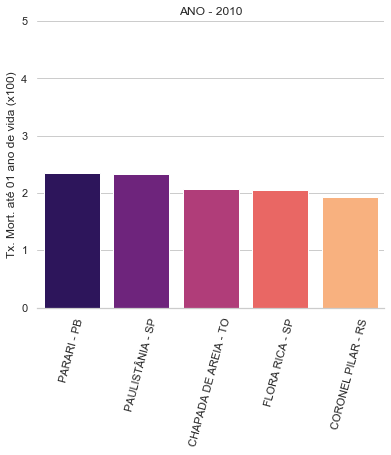

In [374]:
g10 = sns.catplot(x='municipio-uf', y='tx_mort1', col="ANO", aspect=1.2, saturation=.9, \
            kind="bar", data=top5_2010, ci=None, palette=("magma"))
(g10.set_axis_labels("", "Tx. Mort. até 01 ano de vida (x100)")\
# .set_xticklabels( top5_ano[top5_ano['ANO'].isin(['{col_name}'])]['municipio-uf'].to_list() )\
.set_xticklabels(rotation=75)\
.set_titles("{col_var} - {col_name}")\
.set(ylim=(0,5))\
.despine(left=True))